In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11800284859989294625
xla_global_id: -1
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 10062135296
locality {
  bus_id: 1
  links {
  }
}
incarnation: 6293703434137856668
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3060, pci bus id: 0000:01:00.0, compute capability: 8.6"
xla_global_id: 416903419
]


In [2]:
import pandas as pd
import numpy as np
import scipy.stats as st
#import wquantiles
import matplotlib.pyplot as plt
import seaborn as sns

# 중간값 추정

In [8]:
state = pd.read_csv("C:\\Users\\yamingu\\Desktop\\statistics data\\state.csv")
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [9]:
# Population

# 평균
print("평균 : ", state['Population'].mean())

# 절사평균
# 옵션 : 양 끝에서 10% 의 데이터 제외
# import scipy.stats as st
print("절사평균 : ", st.trim_mean(state['Population'], 0.1))

# 중간값
print("중간값 : ", state['Population'].median())

평균 :  6162876.3
절사평균 :  4783697.125
중간값 :  4436369.5


In [10]:
# Murder.Rate

#평균
print("평균 : ", state['Murder.Rate'].mean())

#절사평균
print("절사평균 : ", st.trim_mean(state['Murder.Rate'], 0.1))

#중간값
print("중간값 : ", state['Murder.Rate'].median())


# 주별 인구를 고려한 살인율 가중평균
# import np
print("가중평균 : ", np.average(state['Murder.Rate'], weights=state['Population']))


# 가중 중간값
# import wquantiles
print("가중 중간값 : ", wquantiles.median(state['Murder.Rate'], weights=state['Population']))

평균 :  4.066
절사평균 :  3.9450000000000003
중간값 :  4.0
가중평균 :  4.445833981123393


NameError: name 'wquantiles' is not defined

# 변이 추정

pip install statsmodels

In [12]:
import statsmodels.api as sm

In [13]:
state = pd.read_csv("C:\\Users\\yamingu\\Desktop\\statistics data\\state.csv")
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [14]:
# 표준편차
print("표준편차 : ", state['Population'].std())

# 사분위범위(IQR)
print("IQR : ", state['Population'].quantile(0.75) - state['Population'].quantile(0.25))

# 중위절대편차(MAD)
print("MAD : ", sm.robust.scale.mad(state['Population']))

표준편차 :  6848235.347401142
IQR :  4847308.0
MAD :  3849876.1459979336


# 데이터 분포 탐색

## 백분위수와 boxplot

In [15]:
state['Murder.Rate'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

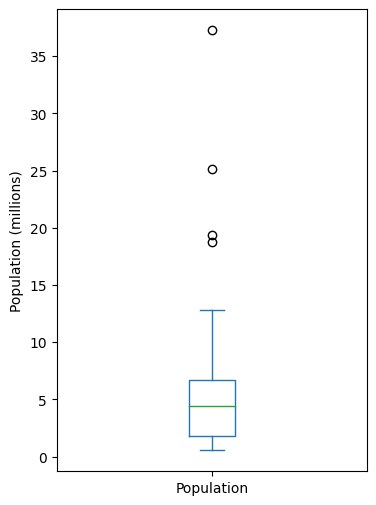

In [16]:
ax = (state['Population']/1_000_000).plot.box(figsize = (4,6))
ax.set_ylabel('Population (millions)')

## 도수분포표와 히스토그램

In [17]:
binnedPopulation = pd.cut(state['Population'], 10)
binnedPopulation.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Population (millions)')

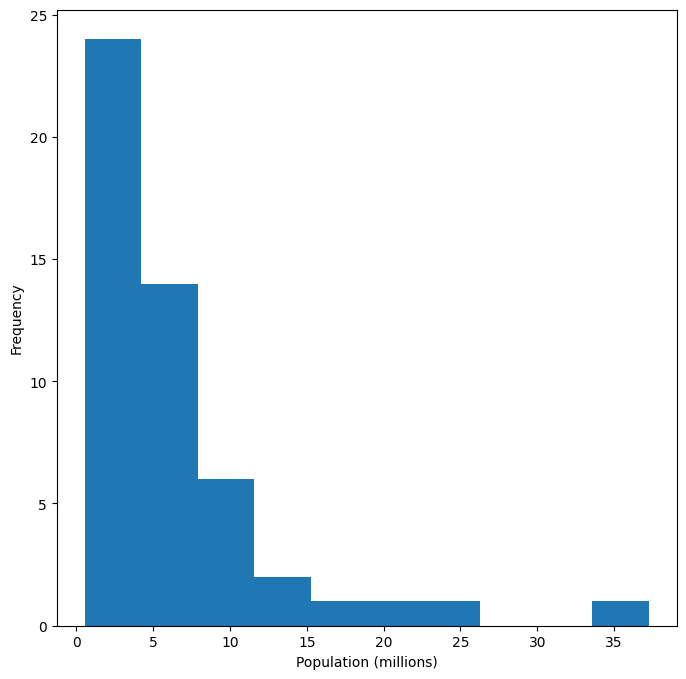

In [18]:
ax = (state['Population'] / 1_000_000).plot.hist(figsize = (8,8))
ax.set_xlabel('Population (millions)')

## 밀도 그림과 추정

Text(0.5, 0, 'Murder Rate (per 100,000)')

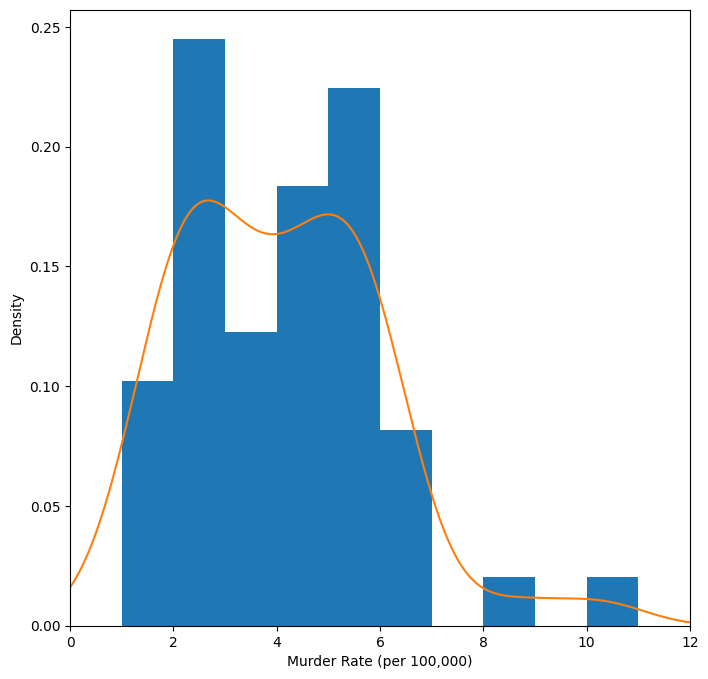

In [19]:
ax = state['Murder.Rate'].plot.hist(density = True, xlim = [0,12], bins = range(1,12), figsize = (8,8))
state['Murder.Rate'].plot.density(ax=ax)
ax.set_xlabel('Murder Rate (per 100,000)')

# 이진 데이터와 범주 데이터 탐색

In [20]:
dfw = pd.read_csv("C:\\Users\\yamingu\\Desktop\\statistics data\\dfw_airline.csv")
dfw

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


In [21]:
dfw.transpose()

,0
Carrier,64263.16
ATC,84856.50
Weather,11235.42
Security,343.15
Inbound,118427.82


Text(0, 0.5, 'Count')

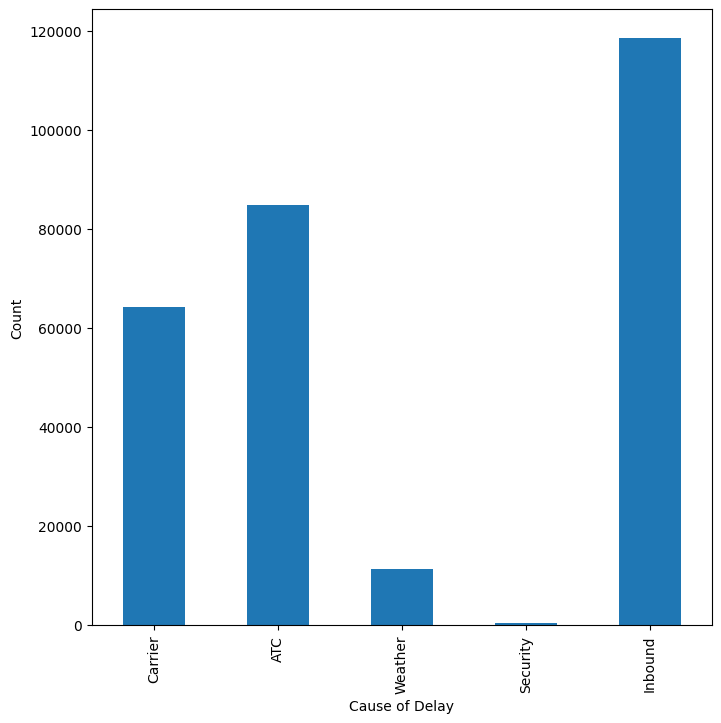

In [22]:
ax = dfw.transpose().plot.bar(figsize = (8,8), legend = False)
ax.set_xlabel('Cause of Delay')
ax.set_ylabel('Count')

# 상관관계

## 상관관계 분석

In [23]:
sp500_px = pd.read_csv("C:\\Users\\yamingu\\Desktop\\statistics data\\sp500_data.csv")
sp500_sym = pd.read_csv("C:\\Users\\yamingu\\Desktop\\statistics data\\sp500_sectors.csv")

<AxesSubplot:>

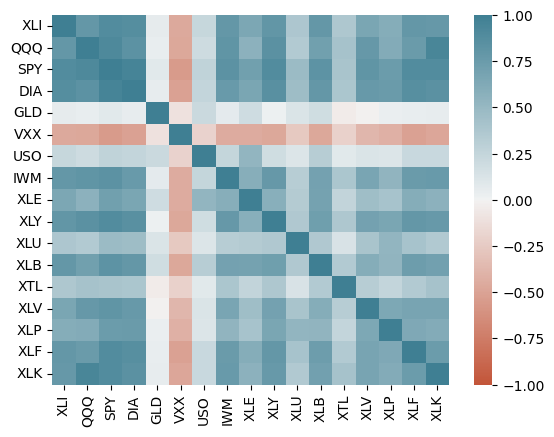

In [24]:
etfs = sp500_px.loc[sp500_px['Unnamed: 0'] > '2012-07-01',
                   sp500_sym[sp500_sym['sector']=='etf']['symbol']]
sns.heatmap(etfs.corr(), vmin = -1, vmax = 1,
           cmap = sns.diverging_palette(20,220, as_cmap = True))

## 산점도

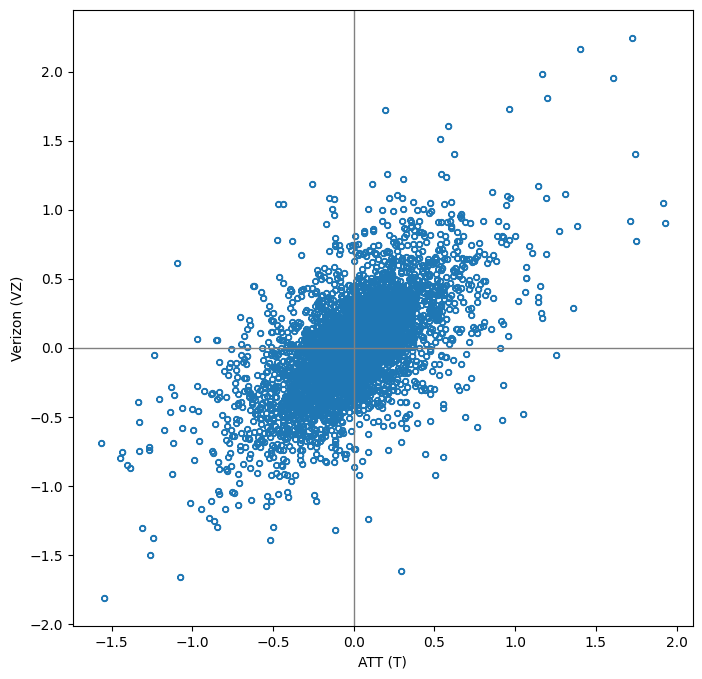

In [25]:
ax = sp500_px.plot.scatter(x = 'T', y = 'VZ', figsize = (8,8), marker = '$\u25EF$')
ax.set_xlabel('ATT (T)')
ax.set_ylabel('Verizon (VZ)')
ax.axhline(0, color = 'grey', lw = 1)
ax.axvline(0, color = 'grey', lw = 1)

# 두 개 이상의 변수 탐색

## 수치형 vs 수치형

In [3]:
kc_tax = pd.read_csv("C:\\Users\\yamingu\\Desktop\\statistics data\\kc_tax.csv")
kc_tax0 = kc_tax.loc[(kc_tax.TaxAssessedValue < 750000) &
                     (kc_tax.SqFtTotLiving > 100) &
                     (kc_tax.SqFtTotLiving < 3500), :]
kc_tax0.shape

(432693, 3)

Text(0, 0.5, 'Tax-Assessed Value')

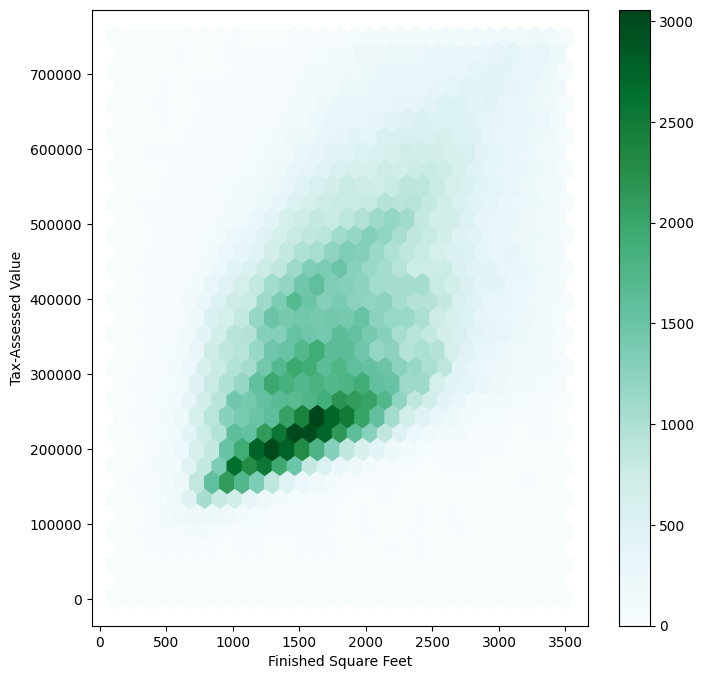

In [4]:
ax = kc_tax0.plot.hexbin(x = 'SqFtTotLiving', y = 'TaxAssessedValue',
                        gridsize=30, sharex=False, figsize=(8,8))
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

Text(0, 0.5, 'Tax-Assessed Value')

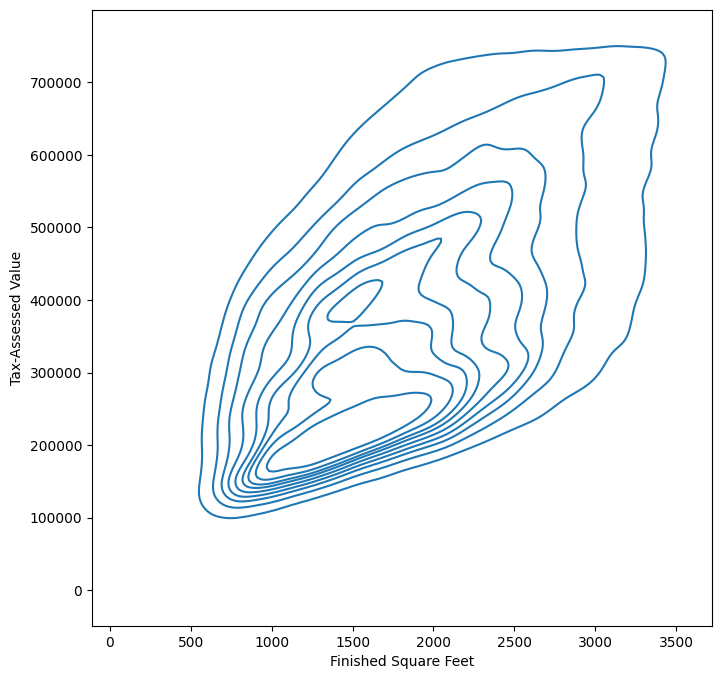

In [5]:
fig, ax = plt.subplots(figsize = (8,8))
ax = sns.kdeplot(data = kc_tax0, x = 'SqFtTotLiving', y = 'TaxAssessedValue', ax=ax)
ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax-Assessed Value')

## 범주형 vs 범주형

In [8]:
lc_loans = pd.read_csv("C:\\Users\\yamingu\\Desktop\\statistics data\\lc_loans.csv")
lc_loans.head()

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B


In [12]:
crosstab = lc_loans.pivot_table(index = 'grade', columns = 'status',
                               aggfunc = lambda x:len(x), margins = True)

crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [13]:
df = crosstab.loc['A':'G',:].copy()
df.loc[:, 'Charged Off':'Late'] = df.loc[:, 'Charged Off':'Late'].div(df['All'], axis = 0)
df['All'] = df['All'] / sum(df['All'])

perc_crosstab = df
perc_crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,0.021548,0.690454,0.281528,0.006470,0.160746
B,0.040054,0.709013,0.235401,0.015532,0.293529
C,0.049828,0.735702,0.191495,0.022974,0.268039
D,0.067410,0.717328,0.184189,0.031073,0.164708
E,0.081657,0.707936,0.170929,0.039478,0.077177
F,0.118258,0.654371,0.180409,0.046962,0.028614
G,0.126196,0.614008,0.198396,0.061401,0.007187


## 범주형 vs 수치형

Text(0.5, 0.98, '')

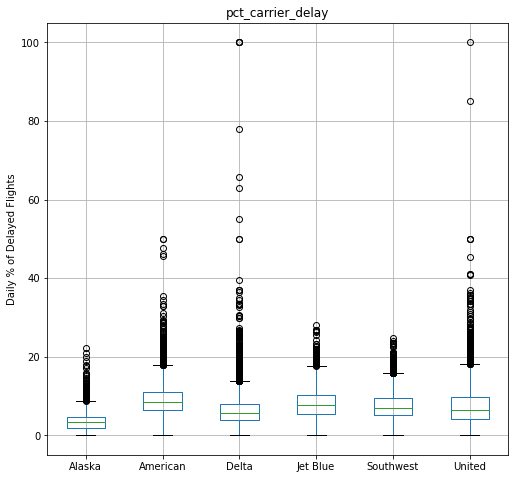

In [17]:
# 박스플롯

airline_stats = pd.read_csv("C:\\Users\\yamingu\\Desktop\\statistics data\\airline_stats.csv")

ax = airline_stats.boxplot(by = 'airline', column = 'pct_carrier_delay', figsize = (8,8))
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')
plt.suptitle('')

Text(0, 0.5, 'Daily % of Delayed Flights')

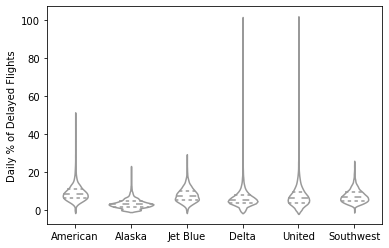

In [23]:
# 바이올린 플롯

ax = sns.violinplot(x = airline_stats.airline, y = airline_stats.pct_carrier_delay,
                   inner = 'quartile', color = 'white')
ax.set_xlabel('')
ax.set_ylabel('Daily % of Delayed Flights')

## 다변수 시각화

In [26]:
zip_codes = [98188, 98105, 98108, 98126]
kc_tax_zip = kc_tax0.loc[kc_tax0.ZipCode.isin(zip_codes), :]
kc_tax_zip.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
10,202000.0,830,98108.0
11,210000.0,1130,98108.0
12,193000.0,1560,98108.0


In [34]:
def hexbin(x, y, color, **kwargs):
    cmap = sns.light_palette(color, as_cmap=True)
    plt.hexbin(x,y, gridsize=25, cmap=cmap, **kwargs)

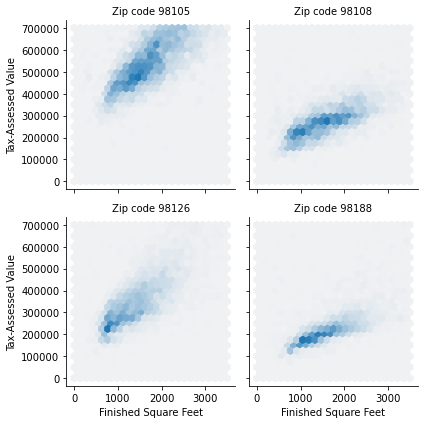

In [36]:
g = sns.FacetGrid(kc_tax_zip, col = 'ZipCode', col_wrap = 2)
g.map(hexbin, 'SqFtTotLiving', 'TaxAssessedValue',
     extent=[0, 3500, 0, 700000])
g.set_axis_labels('Finished Square Feet', 'Tax-Assessed Value')
g.set_titles('Zip code {col_name:.0f}')